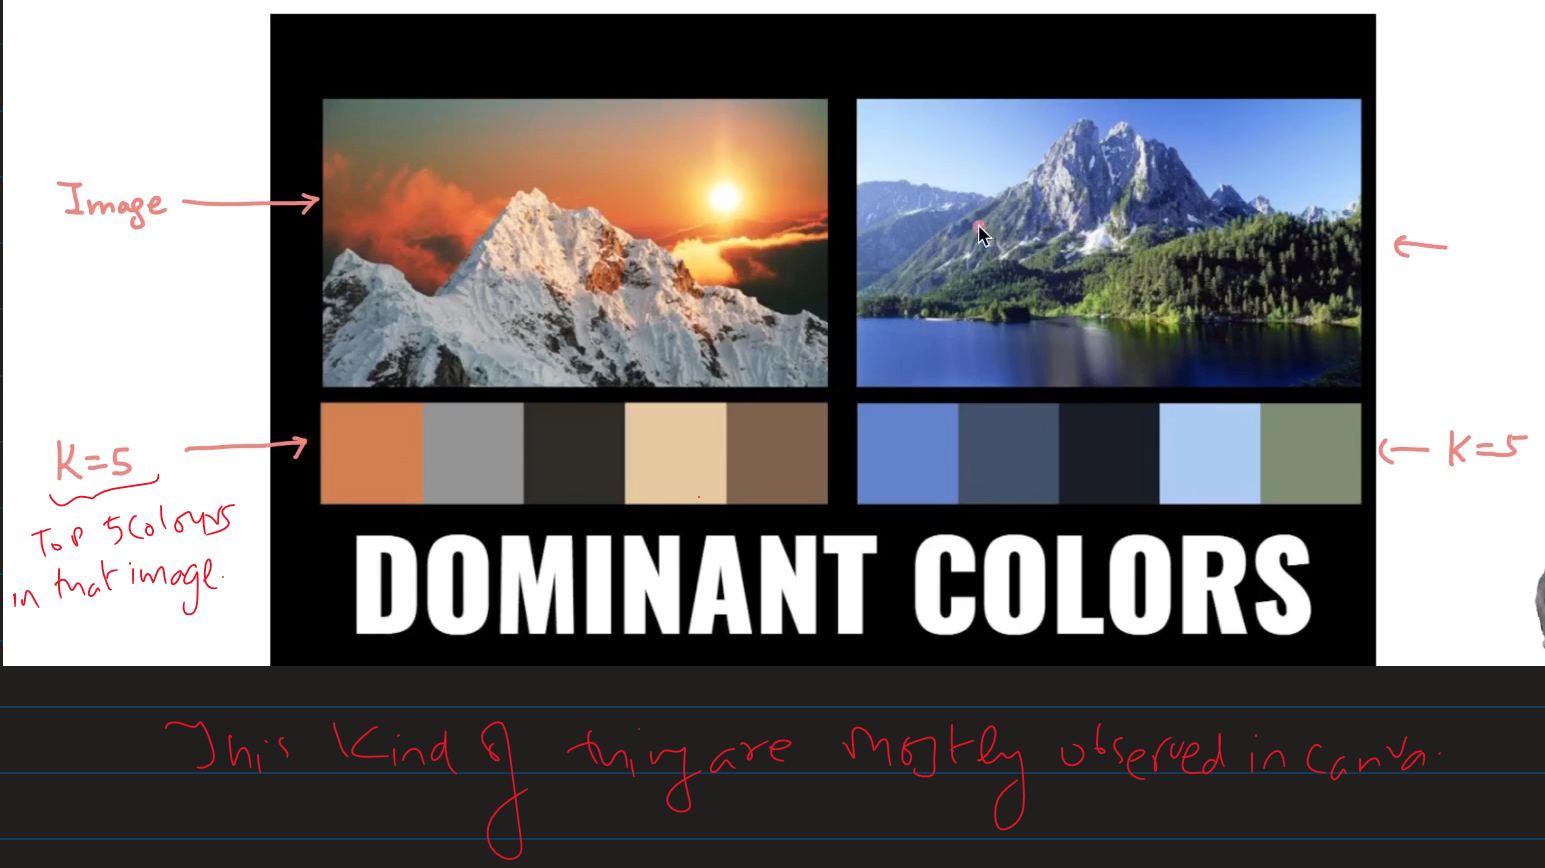

In [29]:
import  matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [30]:
img = cv2.imread("Pillamgolla Akhil.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # if you dont mention this line out image will be in bgr format.

img = cv2.resize(img, (387,504)) # we resize so we can reduce the rows and columns.
# we had devided the actual numbers by 4 to get this values & reversed them.

print(img.shape) # rows,column,channels (R,G,B)

(504, 387, 3)


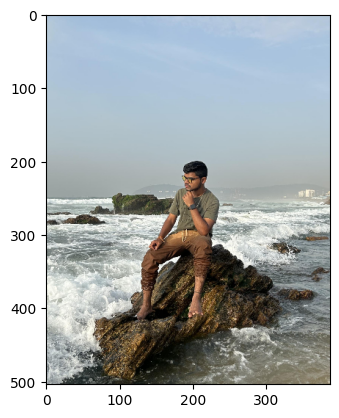

In [31]:
plt.imshow(img)
plt.show() # we get the colour in rgb.

`we can treat each unique colour  in image as a 3 dimentional space `

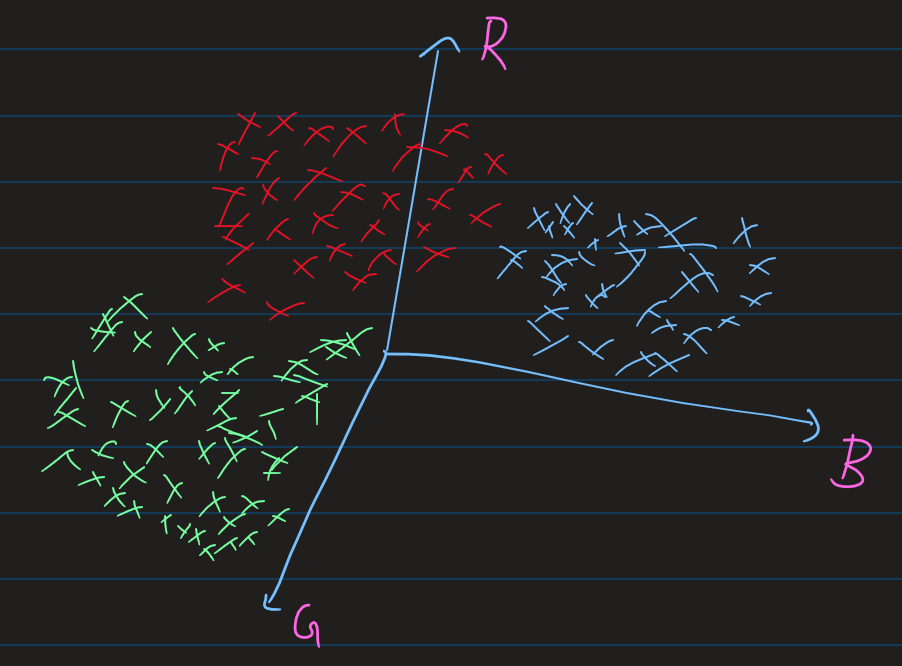

`Here Each Pixel is one data point`

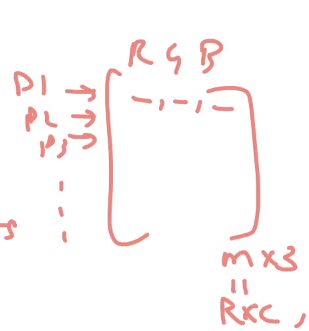

Here p is the pixel

In [32]:
X = img.reshape((-1,3)) #  here -1 is m
print(X.shape) # this is our input. 
# as we resized above we had reduced the pixels here.

(195048, 3)


In [33]:
# lets suppose we want 4 dominant values we will fix  the values here. 

k = 4 # this will give the dominant colours 
model = KMeans(n_clusters=k) # here number of cluster will be same as K. 
model.fit(X) # we will fit the input here.

KMeans(n_clusters=4)

In [34]:
centroids = model.cluster_centers_
# this attribute will store the centriod 

In [35]:
print(centroids) # we have 4 centriods as k.

[[163.20982808 168.31395415 164.90613181]
 [ 45.03149249  37.93956659  26.68119539]
 [184.93500997 201.59563166 213.79595272]
 [114.59472055 106.47803707  91.68177234]]


In [36]:
centroids.shape # cluster , RGB

(4, 3)

In [37]:
# RGB cannot read the data if its in float. 

colours = np.array(centroids,dtype='uint8')  # uint8 - the max int value is 255 & smallest is 0. 
# uint8 this will not waste memory 

In [38]:
print(colours) # dominant colours 
# R | G | B

[[163 168 164]
 [ 45  37  26]
 [184 201 213]
 [114 106  91]]


------

# Understanding Purpose

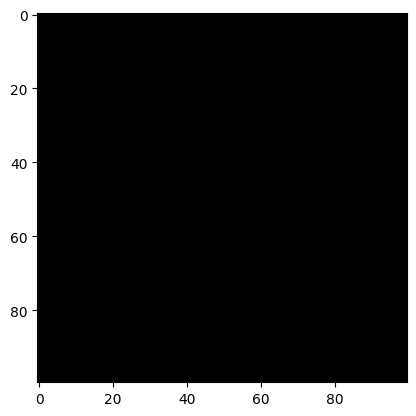

In [39]:
# colour patch  (100,100,3) -> Red Color 

mat = np.zeros((100,100,3),dtype='uint8') # the same data type is there in image 
#  print(mat) - this give many zero matises

plt.imshow(mat)
plt.show()

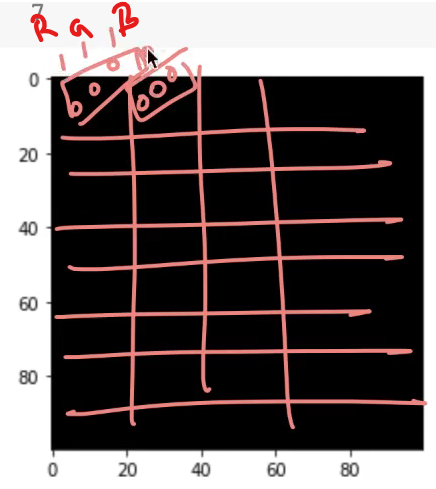

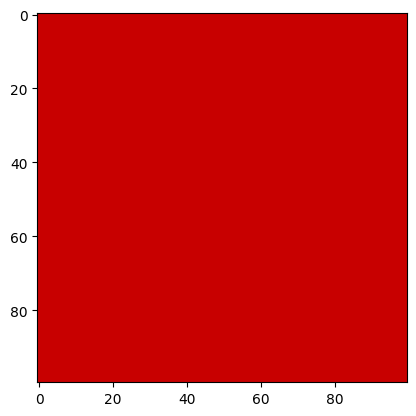

In [40]:
# for red colour 
# colour patch  (100,100,3) -> Red Color 

mat = np.zeros((100,100,3),dtype='uint8') # the same data type is there in image 
#  print(mat) - this give many zero matises
mat[:,:,0] = 200
#   mat[:,:,1] = 200 - green Colour 
#    mat[:,:,2] = 200 - Blue Colour 
# if we increase 200 it will be light shade 
# if we reduce   200 it will be dark shade
plt.imshow(mat)
plt.show()

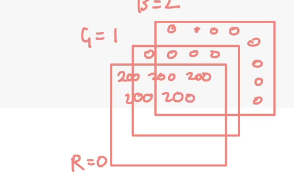

------

[163 168 164]


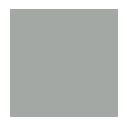

[45 37 26]


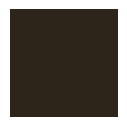

[184 201 213]


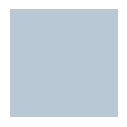

[114 106  91]


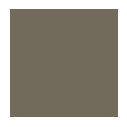

In [44]:
# colour patch  (100,100,3) -> Red Color 
i = 1
for colour in colours:
    mat = np.zeros((100,100,3),dtype='uint8') # the same data type is there in image 
    # this is empty matrix to store colour
    print(colour)
    plt.subplot(1,k,i) # this make the plot look small
    plt.axis("off")
    i = i+1
    mat[:,:,:] = colour # this will fill the colour (R,G,B)
    plt.imshow(mat)
    plt.show()
    # the image is made up of below trip. 

------

In [ ]:
# Basic Segmentation based on similar colour regions.
# segmentation will partitions an image into regions

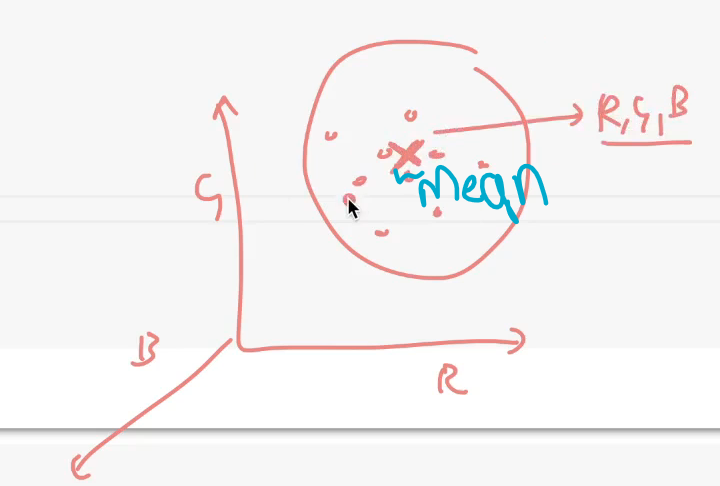

here we will replace all the cluster with mean colour (k colors)

In [45]:
# we can have 10 unique values like 
np.unique(model.labels_) # we can know data points which cluster this belong to. 

array([0, 1, 2, 3])

In [46]:
model.labels_.shape # prediction for every data point
# here each pixel is having label.

(195048,)

In [51]:
# creating the new image which is repainted version of our image
newImg = np.zeros((X.shape),dtype='uint8')
print(newImg.shape) # m rows *  3 columns
# here m = product of rows * columns

(195048, 3)


`This is a kind of a flattned image where Each row represent the 1 pixel of image`

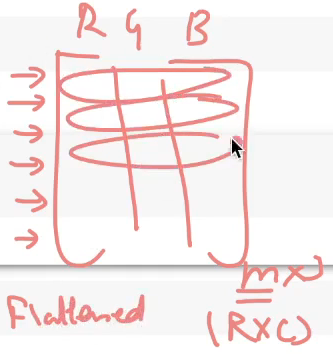 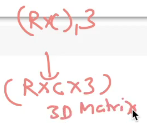

In [54]:
for i in range(newImg.shape[0]): 
    newImg[i] = colours[model.labels_[i]] # we will get colour id 
    

In [56]:
newImg = newImg.reshape(img.shape) # we reshape for the values.

In [57]:
print(newImg.shape)

(504, 387, 3)


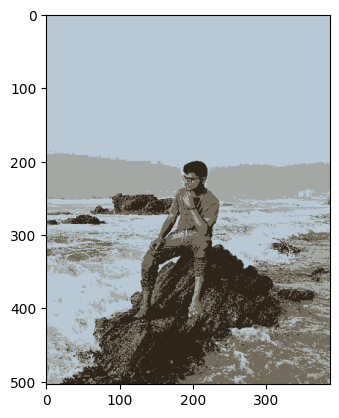

In [59]:
plt.imshow(newImg)

`if we increas the k value then it will increase the dominant colours in the image`